<a href="https://colab.research.google.com/github/Nub-T/Simple_Production/blob/main/RIP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<i>RIP Algorithm</i><br>
--
Coded by : Yehezk34

In [8]:
import zipfile,os
local_zip = 'Tmp/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Tmp')
zip_ref.close()

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

batch_size = 10
img_height = 224
img_width = 224

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Tmp',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/Tmp',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names

Found 421 files belonging to 3 classes.
Using 337 files for training.
Found 421 files belonging to 3 classes.
Using 84 files for validation.


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [16]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 3)

Epoch 1/3
34/34 [==============================] - 38s 1s/step - loss: 0.9500 - accuracy: 0.6291 - val_loss: 1.0470 - val_accuracy: 0.6548
Epoch 2/3
34/34 [==============================] - 38s 1s/step - loss: 0.8694 - accuracy: 0.6231 - val_loss: 1.1080 - val_accuracy: 0.5833
Epoch 3/3
34/34 [==============================] - 38s 1s/step - loss: 0.7899 - accuracy: 0.6617 - val_loss: 1.1065 - val_accuracy: 0.6071


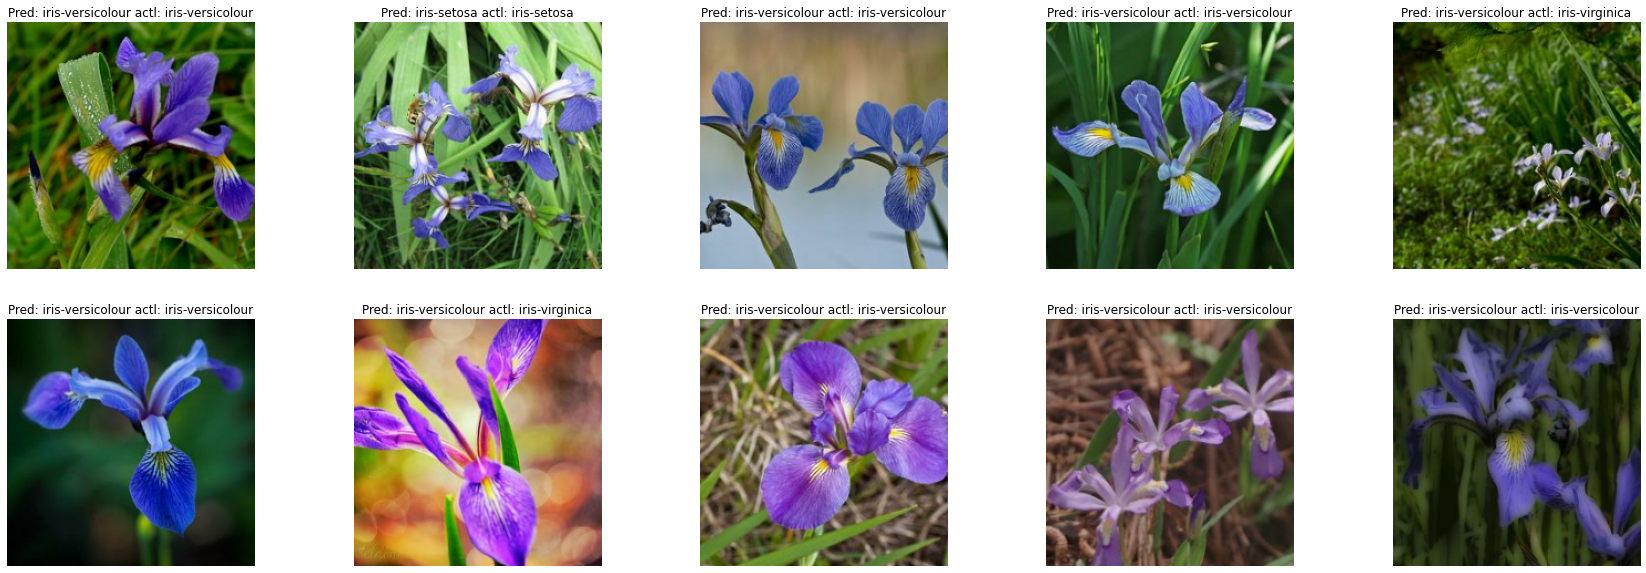

In [17]:
plt.figure(figsize=(30, 10))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl: '+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

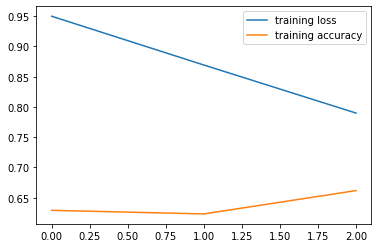

In [18]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

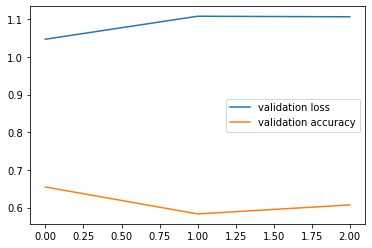

In [19]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [20]:
import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Model

pretrained = InceptionResNetV2(include_top=True,weights='imagenet')
x=pretrained.layers[-2].output
predLayer = Dense(len(class_names),activation='softmax')(x)
MyCnn = Model(inputs=pretrained.input,outputs=predLayer)

for layer in MyCnn.layers[:-40] :
    layer.trainable = False
    

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * 0.3
    
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
retVal = MyCnn.fit(training_ds, validation_data=validation_ds, callbacks=[callback], epochs= 1)

34/34 [==============================] - 108s 3s/step - loss: 1.2759 - accuracy: 0.5697 - val_loss: 6.2909 - val_accuracy: 0.6548


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


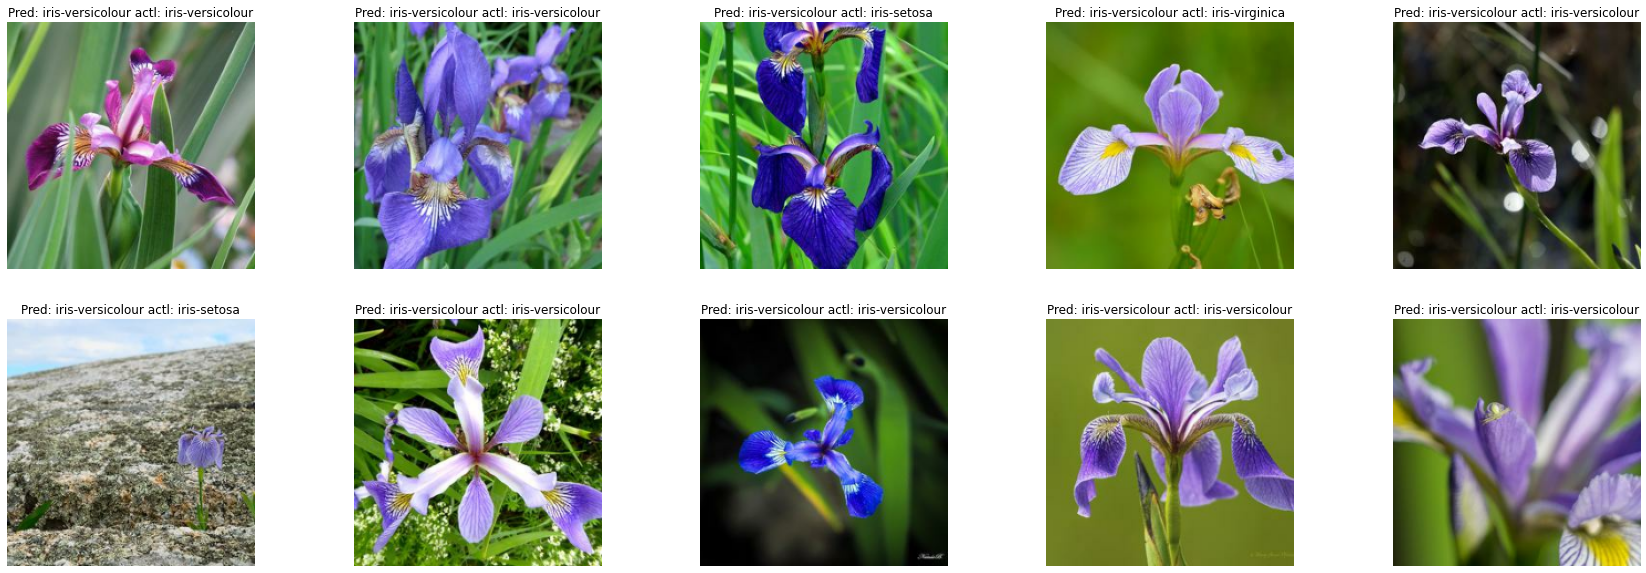

In [21]:
plt.figure(figsize=(30, 10))
for images, labels in validation_ds.take(3):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl: '+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

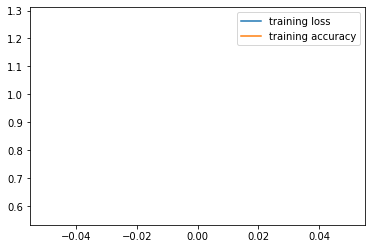

In [22]:
# Training loss
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

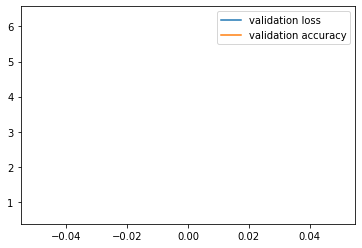

In [23]:
## validation loss and accuracy 
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [24]:
DataFrame = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'class' : []
    }

#Loading model
MyModel = tf.keras.models.Sequential()
MyModel.add(tf.keras.applications.ResNet101(
    include_top = False, weights='imagenet', pooling='avg',))
MyModel.layers[0].trainable = False

import cv2

def LoadDataAndDoEssentials(path, h, w):
    img = cv2.imread(path)
    img = cv2.resize(img, (h, w))
    img = img = np.expand_dims(img, 0)
    
    img = tf.keras.applications.resnet50.preprocess_input(img)
    extractedFeatures = MyModel.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    DataFrame['flattenPhoto'].append(extractedFeatures.flatten())

def ReadAndStoreMyImages(path, cls):
    list_ = os.listdir(path)

    for mem in list_:
        DataFrame['photo_name'].append(mem)
        DataFrame['class'].append(cls)
        imagePath = path + '/' + mem
        LoadDataAndDoEssentials(imagePath, 224, 224)

path1 = '/tmp/iris-setosa'
path2 = '/tmp/iris-versicolour'
path3 = '/tmp/iris-virginica'


ReadAndStoreMyImages(path1, 'setosa')
ReadAndStoreMyImages(path2, 'versicolour')
ReadAndStoreMyImages(path3, 'virginica')

171450368/171446536 [==============================] - 2s 0us/step


In [25]:
# Now cluster them!
Training_Feature_vector = np.array(DataFrame['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 3)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [26]:
print(kmeans.labels_)

[0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 2 2 2 0 0 0 0 0 0 2 2 1 0 0 2 1 2 0
 0 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 2 2 0 1 0 1 1 0 0 1 2 1 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 1 2 0 0 0 1 1 2 0 0 1 2 2 1 0 0 0 0 0 2 0 1 1 0 0 1 2 0 0 1 0 2 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 2 1 1 1 0 0 0 0 2 0 1 0 1 2 1 2 0 0 1 0 1 0 2 0 1 1 2 0 0 0 0 1 2 0
 0 2 0 2 2 0 1 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 2 2 0
 1 0 0 0 1 2 1 0 0 0 2 0 1 0 0 0 1 2 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 0 2 1 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 1 1 1 1 1 0 2 2 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 2 2 0 0 1 0 0 0 0 1 2 0 0 0 0 1 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 0 0 0 1 0 0 2 0 0 1 0 1 0 0 0 1 0 0 2 2 1 0
 0 0 0 0 0 0 0 2 0 0 0 1 0 0]


In [27]:
def drawConclusions():
    zeroCount = 0 
    oneCount = 0
    twoCount = 0

    for mem in kmeans.labels_ :
        if mem == 0:
            zeroCount += 1
        elif mem == 1:
            oneCount += 1
        elif mem == 2:
            twoCount += 1
            
    per0 = zeroCount / len(kmeans.labels_)
    per1 = oneCount / len(kmeans.labels_)
    per2 = twoCount / len(kmeans.labels_)
    
    print ('No. of samples classified in category zero: ' + str(zeroCount) + ' and their % is : ' + str(per0))
    print ('No. of samples classified in category one: ' + str(oneCount) + ' and their % is : ' + str(per1))
    print ('No. of samples classified in category two: ' + str(twoCount) + ' and their % is : ' + str(per2))

In [28]:
drawConclusions()

No. of samples classified in category zero: 269 and their % is : 0.6389548693586699
No. of samples classified in category one: 92 and their % is : 0.21852731591448932
No. of samples classified in category two: 60 and their % is : 0.14251781472684086


In [29]:
predictions = kmeans.labels_
classPred = []
for mem in predictions:
    if mem == 0:
        classPred.append('versicolour')
    elif mem == 1:
        classPred.append('virginica')
    elif mem == 2:
        classPred.append('setosa')

In [31]:
acc = 0
for trueLabel, predictedLabel in zip(DataFrame['class'], classPred):
    if trueLabel == predictedLabel:
        acc += 1

# RIP Accuracy 
print ('Accuracy for third approach is {}'.format(acc/421))

Accuracy for third approach is 0.4584323040380047
